## <b> Loan Application Status Prediction </b>

## <b> Problem Statement:</b>
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

#### <b>Independent Variables:</b>

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

<b>You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.</b> 

<b>Note: The link of the dataset is below. 

Downlaod Files:</b>

https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv

- <b> Importing require library for performing EDA, Data Wrangling and data cleaning</b>

In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Loan Predication CSV dataset file using pandas
df=pd.read_csv('loan_prediction.csv')

In [3]:
print('No of Rows:',df.shape[0])
print('No. of Columns:',df.shape[1])
df.head(2)

No of Rows: 614
No. of Columns: 13


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.duplicated().sum() # This check any if any duplicated entry exit in dataset 

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


    - In loan application status dataset we have 614 rows with 13 columns including target variable.
    - Gender, Married, Education,Self Employed, Credit History, Loan Status are categorical features.
    - A Target Variable is 'Loan_Status' having object datatype and It is categorical variable.
    - There are three types of datatype dtypes: float64(4), int64(1), object(8)

### Missing value check 


Heatmap

<AxesSubplot:>

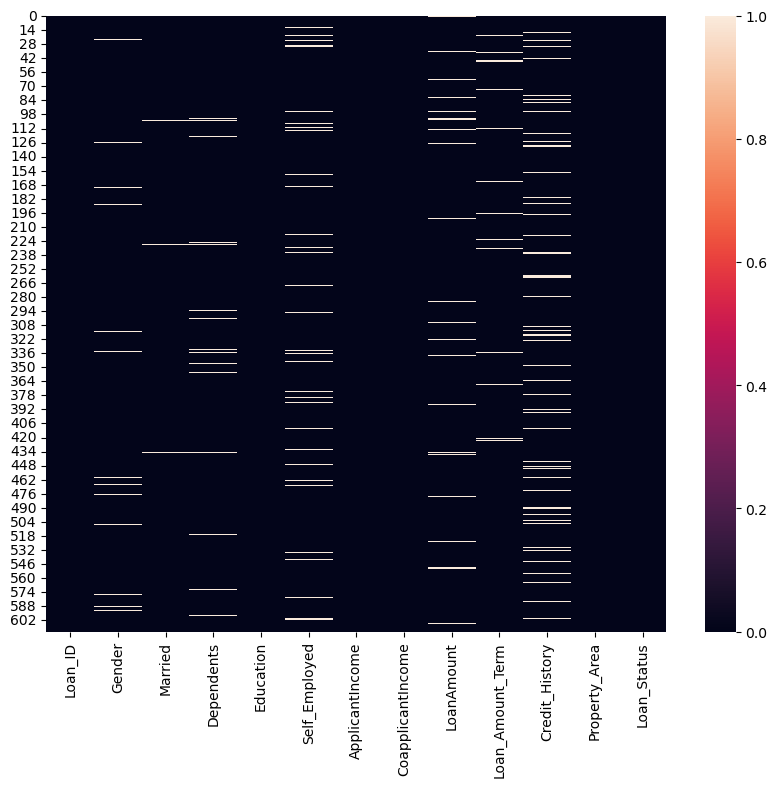

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

In [8]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                   Missing Values  % Missing data
Credit_History                 50        8.143322
Self_Employed                  32        5.211726
LoanAmount                     22        3.583062
Dependents                     15        2.442997
Loan_Amount_Term               14        2.280130
Gender                         13        2.117264
Married                         3        0.488599
Loan_ID                         0        0.000000
Education                       0        0.000000
ApplicantIncome                 0        0.000000
CoapplicantIncome               0        0.000000
Property_Area                   0        0.000000
Loan_Status                     0        0.000000


    - 7 out 13 columns contains missing value.
    - As small amount of data is missing so we use mean amd mode to replace with NaN values.
    
<b> Lets explore categorical features before missing value imputation.</b>

### Start with Enlisting Value counts & Sub-categories of different categorial features available

In [9]:
category=['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']
for i in category:
    print(i)
    print(df[i].value_counts())
    print('='*100)

Gender
Male      489
Female    112
Name: Gender, dtype: int64
Married
Yes    398
No     213
Name: Married, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Credit_History
1.0    475
0.0     89
Name: Credit_History, dtype: int64
Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64


#### Countplot

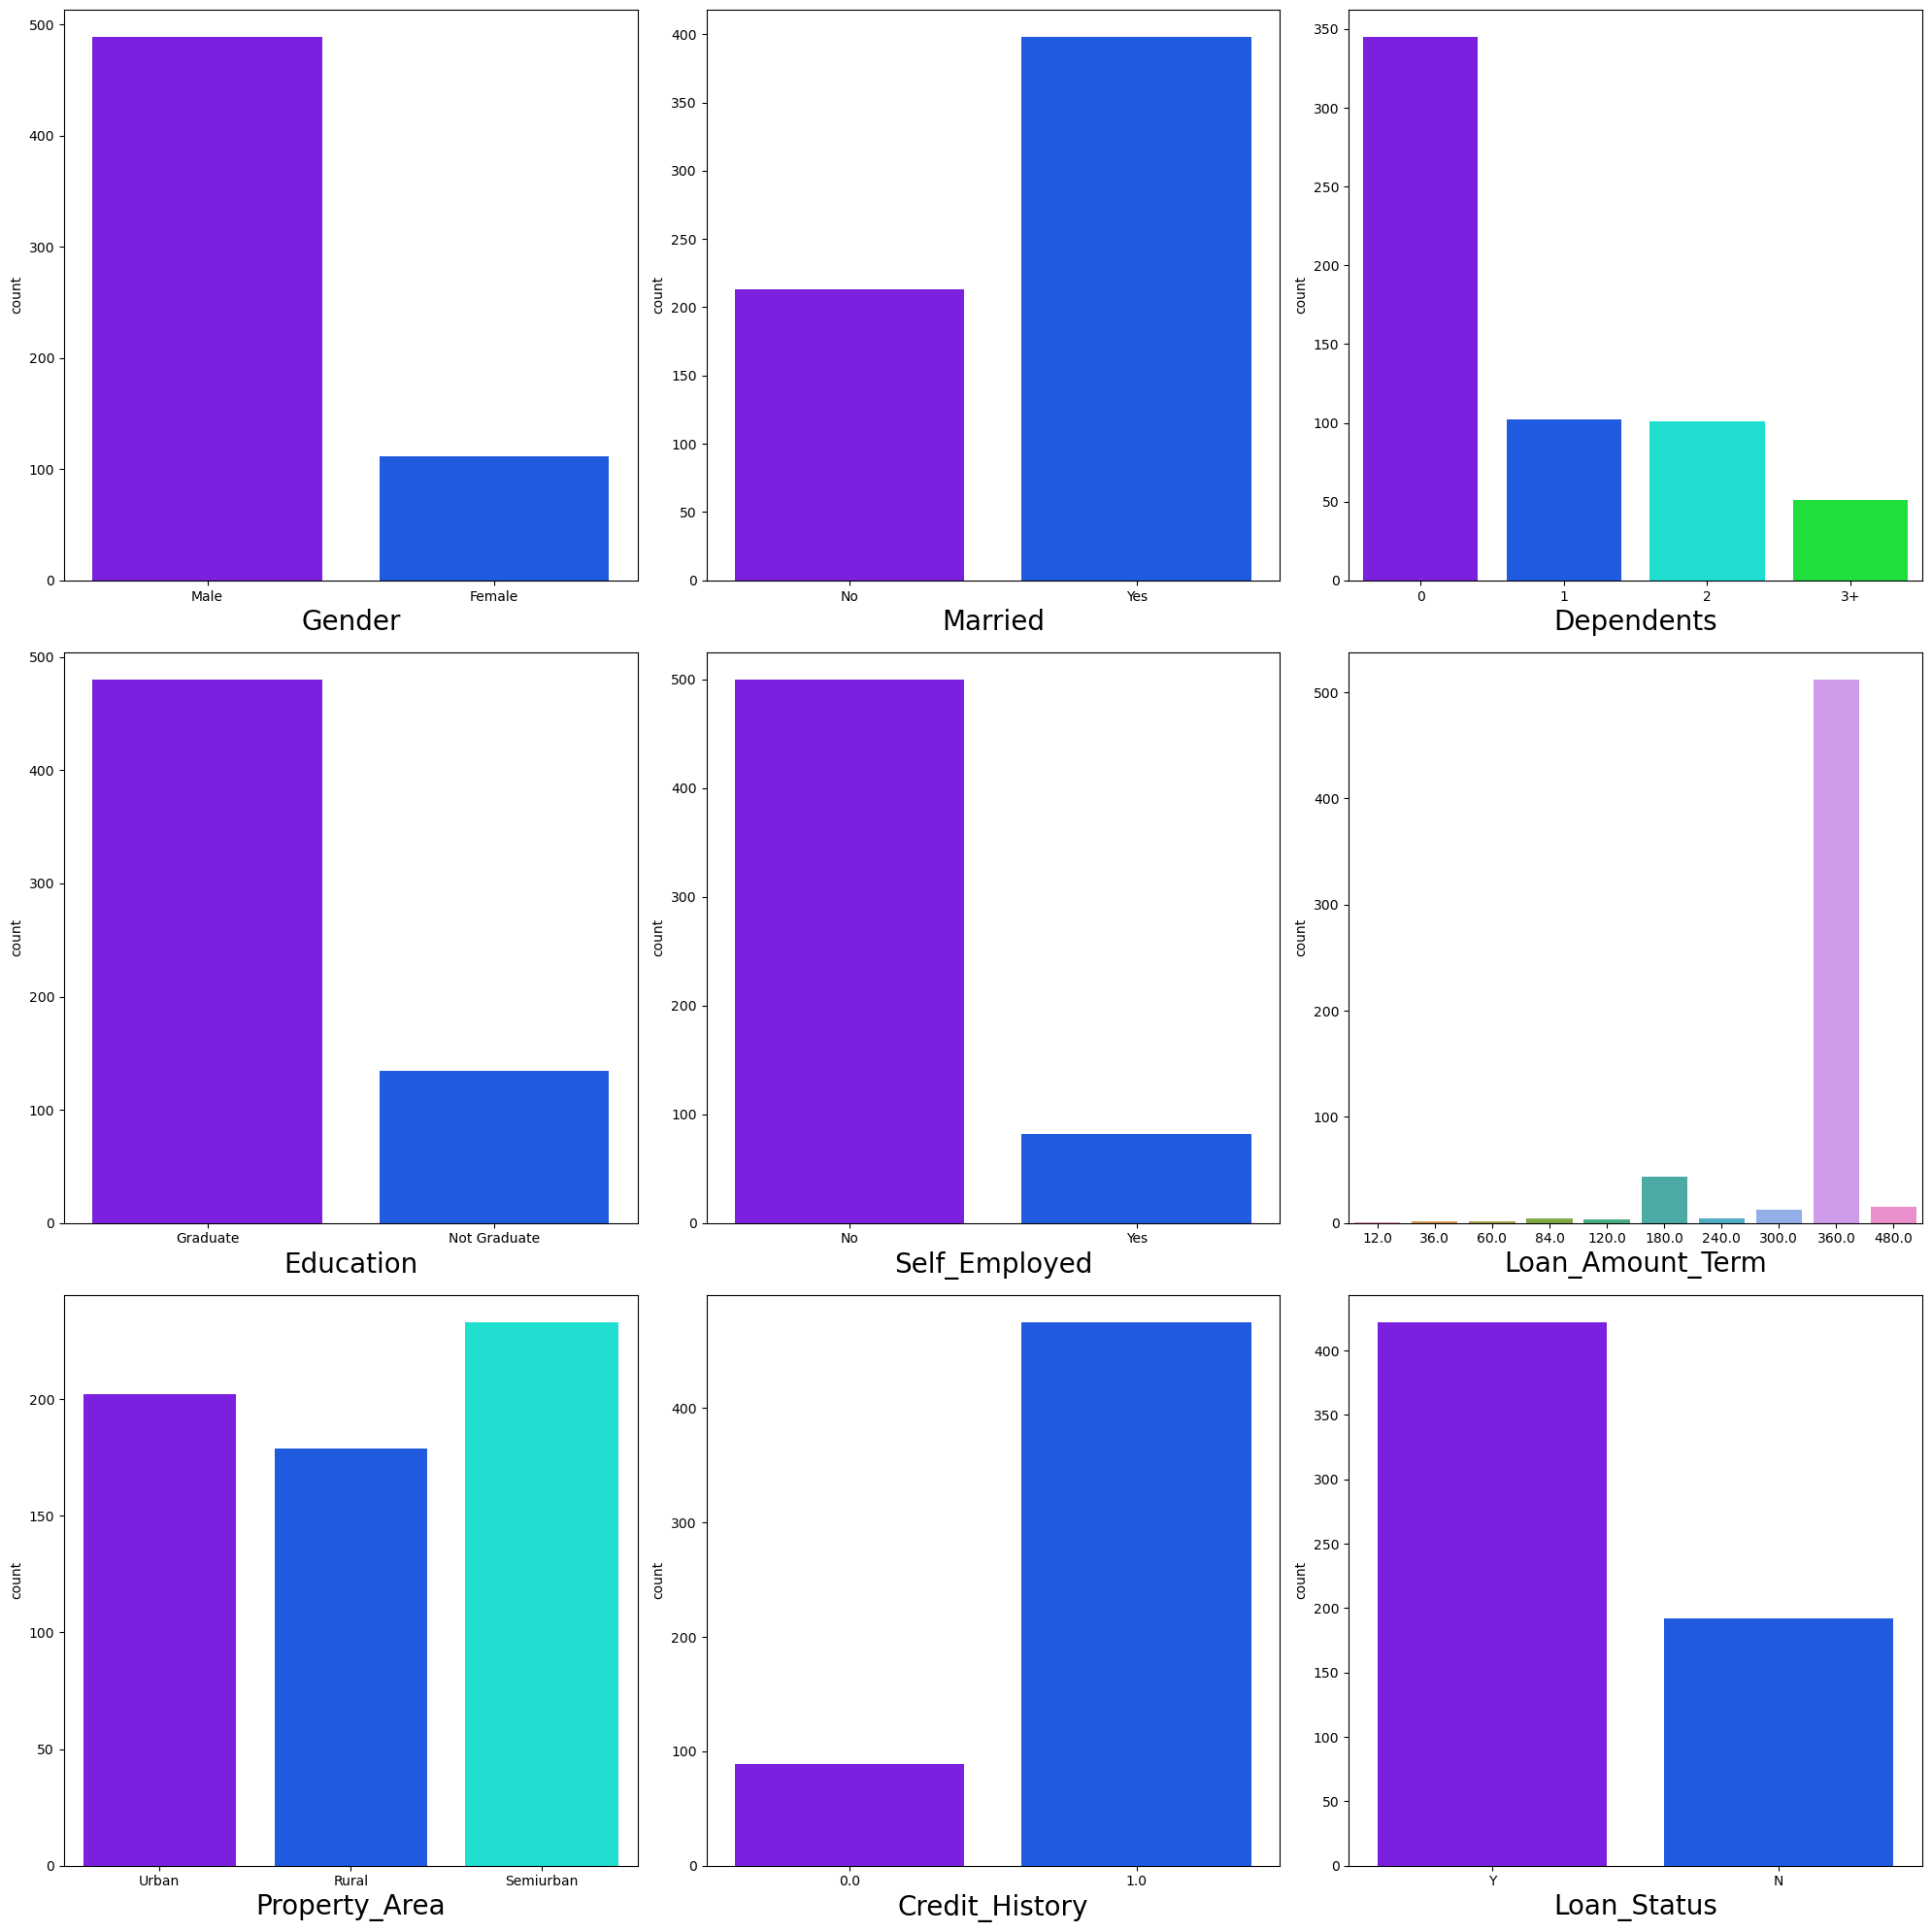

In [10]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
category=['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']
for i in category:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()


     - Out of Total loan application 80 % applicants are Male. We can Explore loan amount for each gender applied and evaluate whether on the same basis loan is approved for each gender or not?
     - Only 20% applicants are self employed. So it will interesting to gain insight on relation between Applicant income and loan approval for non self employed category. We will look to find any benchmark range of Income for loan approval.Another benchmark we will try to find is about loan requirement for these two categories.
     - Nearly 70% are married and 75% of loan applicants are graduates
     - Almost 60% of the applicants have no dependents.
     - Most of applicants come from Semi Urban areas, followed by Urban and Rural areas.
     - 80% people previously have credit history. Normally people having credit history are seen more prone to get loan approval.
     - Nearly 70 % applicant gets loan approved.
    
<b> We can impute categoical variable with mode in that category. For numerical variable we have option of mean and median. If Outliers are to strech then we will impute with median.</b>
    
### Let check outliers for missing values Numerical variable having missing values by plotting boxplot.

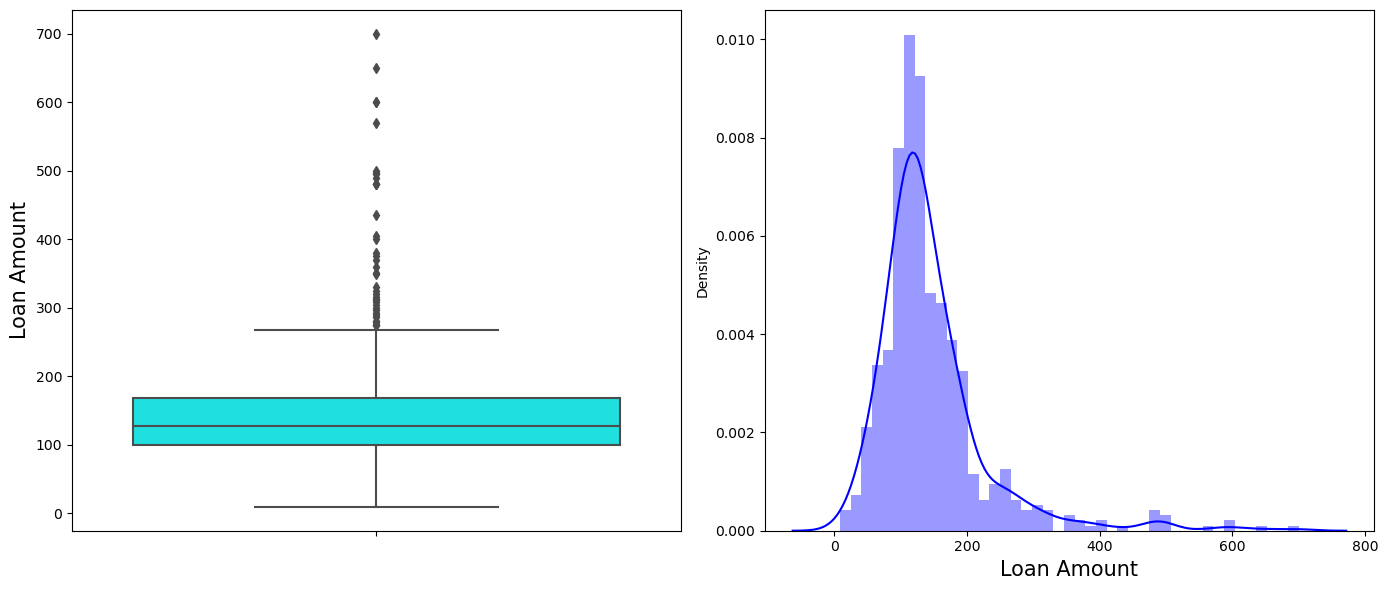

In [11]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='LoanAmount', data=df,color='cyan')
plt.ylabel('Loan Amount',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['LoanAmount'], color='b')
plt.xlabel('Loan Amount',fontsize=15)
plt.tight_layout()
plt.show()

In [12]:
print("Mean of Loan Amount:",df['LoanAmount'].mean())
print("Median of Loan Amount:",df['LoanAmount'].median())

Mean of Loan Amount: 146.41216216216216
Median of Loan Amount: 128.0



- The mean is greater than median loan amount.
- Clearly we can see outliers in boxplot and feature is strecth to far in distribution plot.

<b> As extreme outliers are present in feature and for that reason as data is more sensitive to mean we are going to impute missing values in <u>loan amount  with median.</u> </b>

#### Imputation details :
1. Missing values in Loan amount is impute with median value.
2. Maximum Loan term is 360 Months so Missing value in Loan amount term is replace with 360 Months.
3. Credit History, Self Employed, dependents, Gender and Married are replace with mode of repective features.

In [13]:
# Imputating Missing value with mode for categorical features
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

# Imputation of Numerical features
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [14]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                   Missing Values  % Missing data
Loan_ID                         0             0.0
Gender                          0             0.0
Married                         0             0.0
Dependents                      0             0.0
Education                       0             0.0
Self_Employed                   0             0.0
ApplicantIncome                 0             0.0
CoapplicantIncome               0             0.0
LoanAmount                      0             0.0
Loan_Amount_Term                0             0.0
Credit_History                  0             0.0
Property_Area                   0             0.0
Loan_Status                     0             0.0


<b> Finally, No Missing Value is Present.

We are Now Yes To Go Further !!!</b>

<AxesSubplot:>

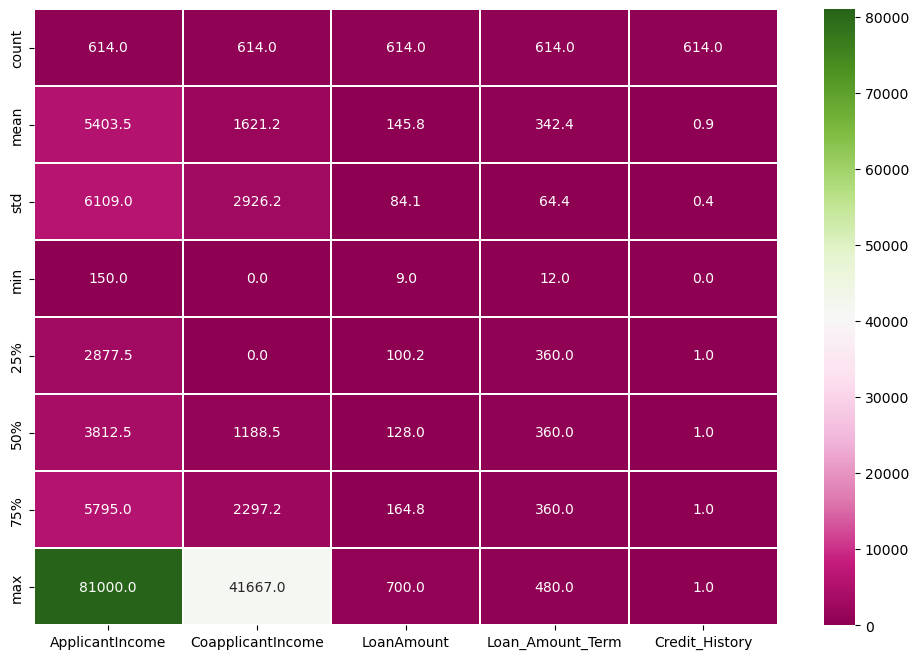

In [15]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(12,8))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')

In [16]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000



- In Applicant Income & Coapplicant Income Std deviation value is greater than median. So data is spread and skewed.
- Taking 75% and Max rows into consideration we can surely say that Outliers exist in Applicant Income, Coapplicant Income,Loan Amount.
- Since Credit History is Categorical variable there is no significance in different statstical parameter of it.
- Minimum Tenure for Loan is 12 Months and Maximum Loan tenure is 480 Months.
- Minimum Applicant income is 150 and maximum is 81000.


### Target Variable


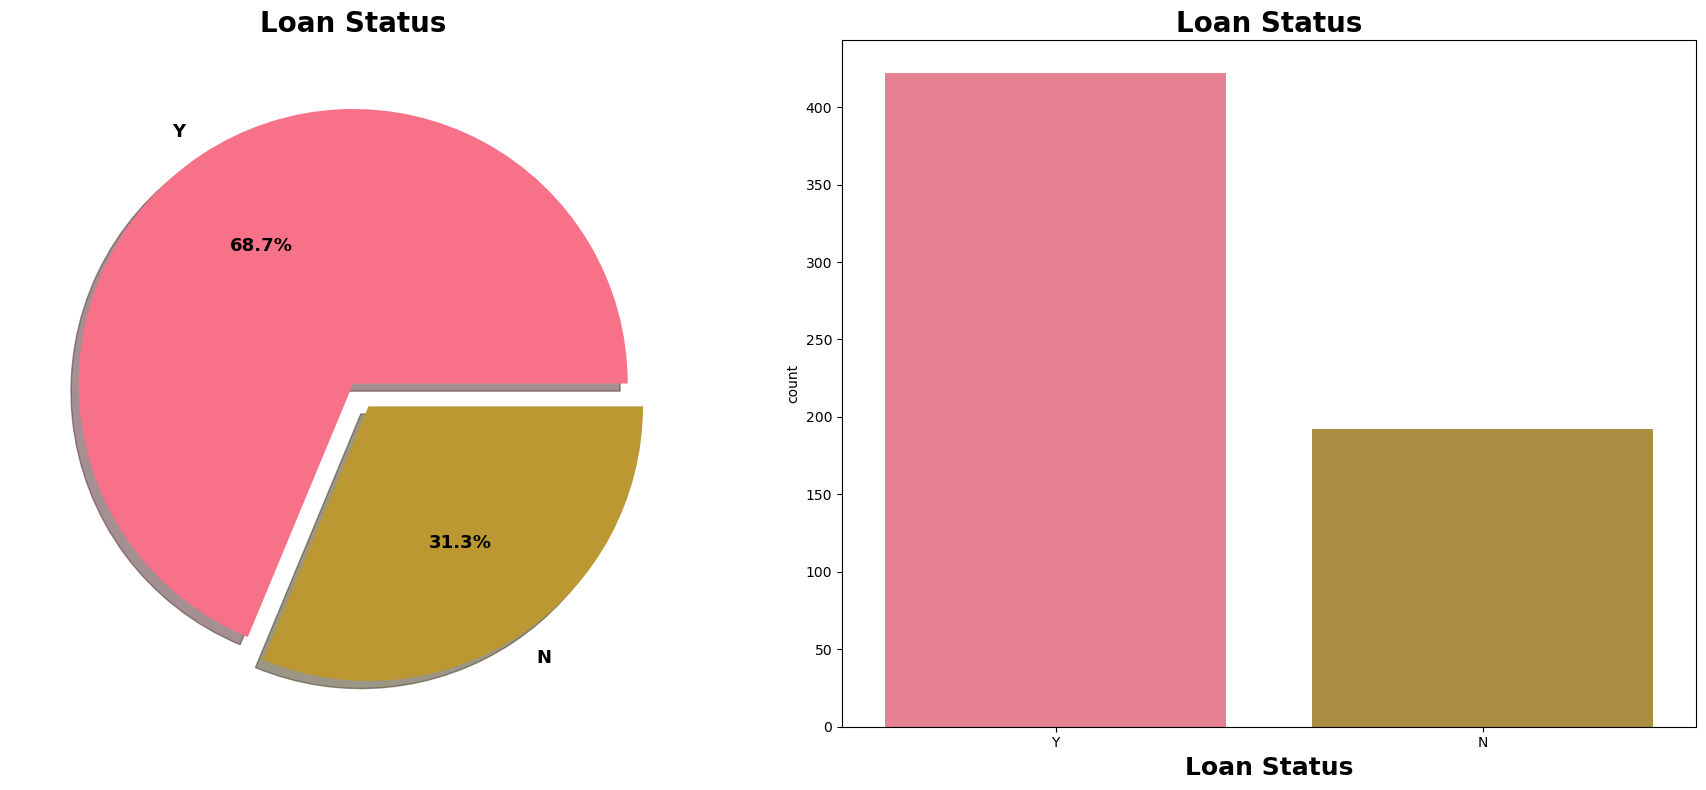

In [17]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Loan_Status'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Loan Status', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Loan_Status',data=df,ax=ax[1])
ax[1].set_title('Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Loan Status",fontsize=18,fontweight ='bold')
plt.show()


- 68.7% Applicants gets loan Approval.
- We can see that dataset is imbalanced in nature.


<b> Let check each feature against Target variable to gain insight into data. </b>

### Gender Vs Loan Status


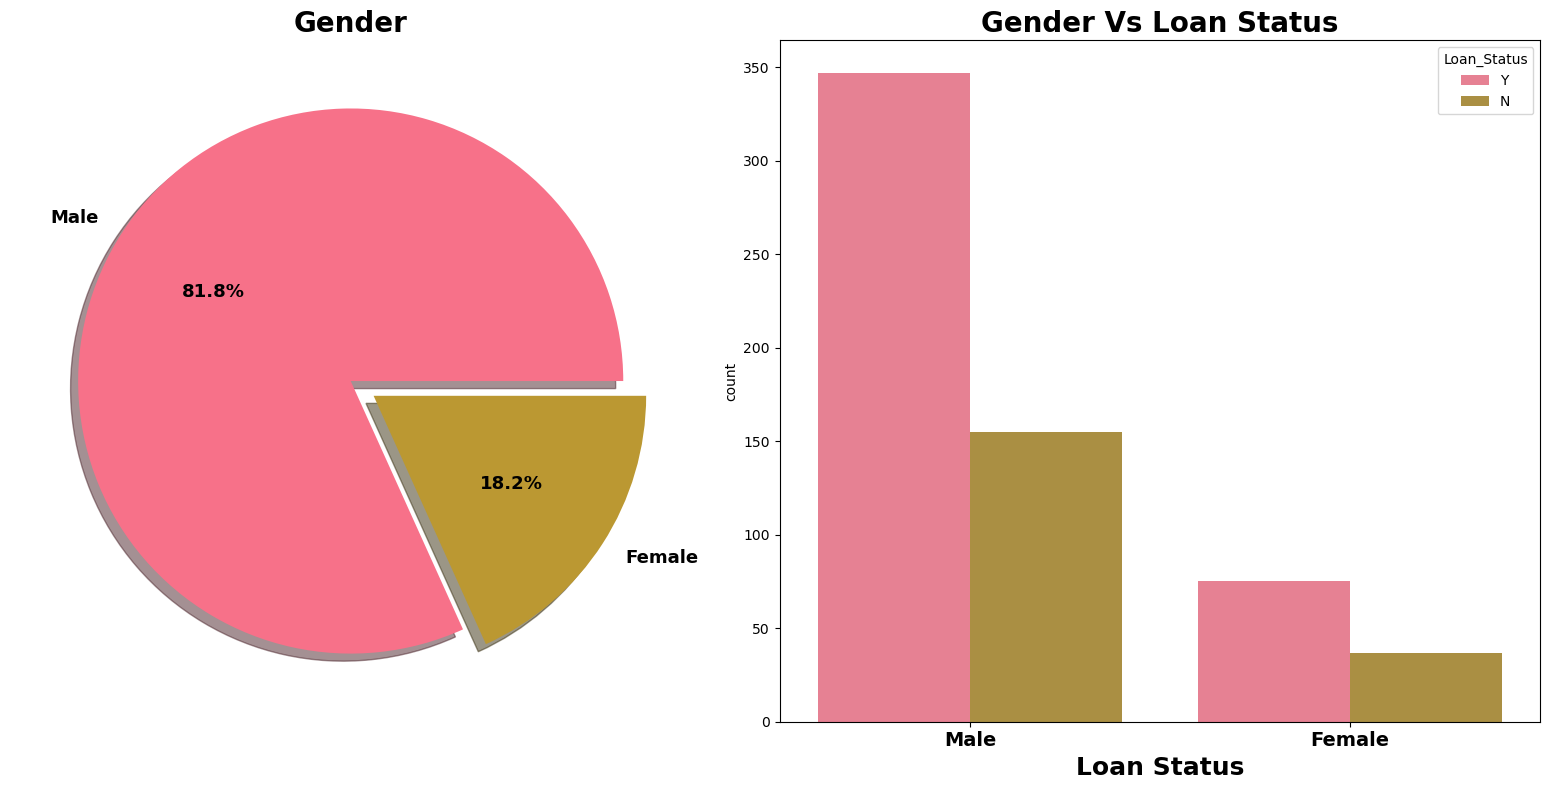

In [18]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Gender', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Gender',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('Gender Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Loan Status",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [19]:
pd.crosstab(df['Gender'],df["Loan_Status"], margins=True).style.background_gradient(cmap='summer_r')

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,155,347,502
All,192,422,614


- 81.8% Applicant are male.
- Irrespective Gender 65 % Applicant from each gender gets loan approval.<b>It means that gender doesnot play any role loan approval. No Discrimation on name of Gender done.</b>

### Married Vs Loan Status

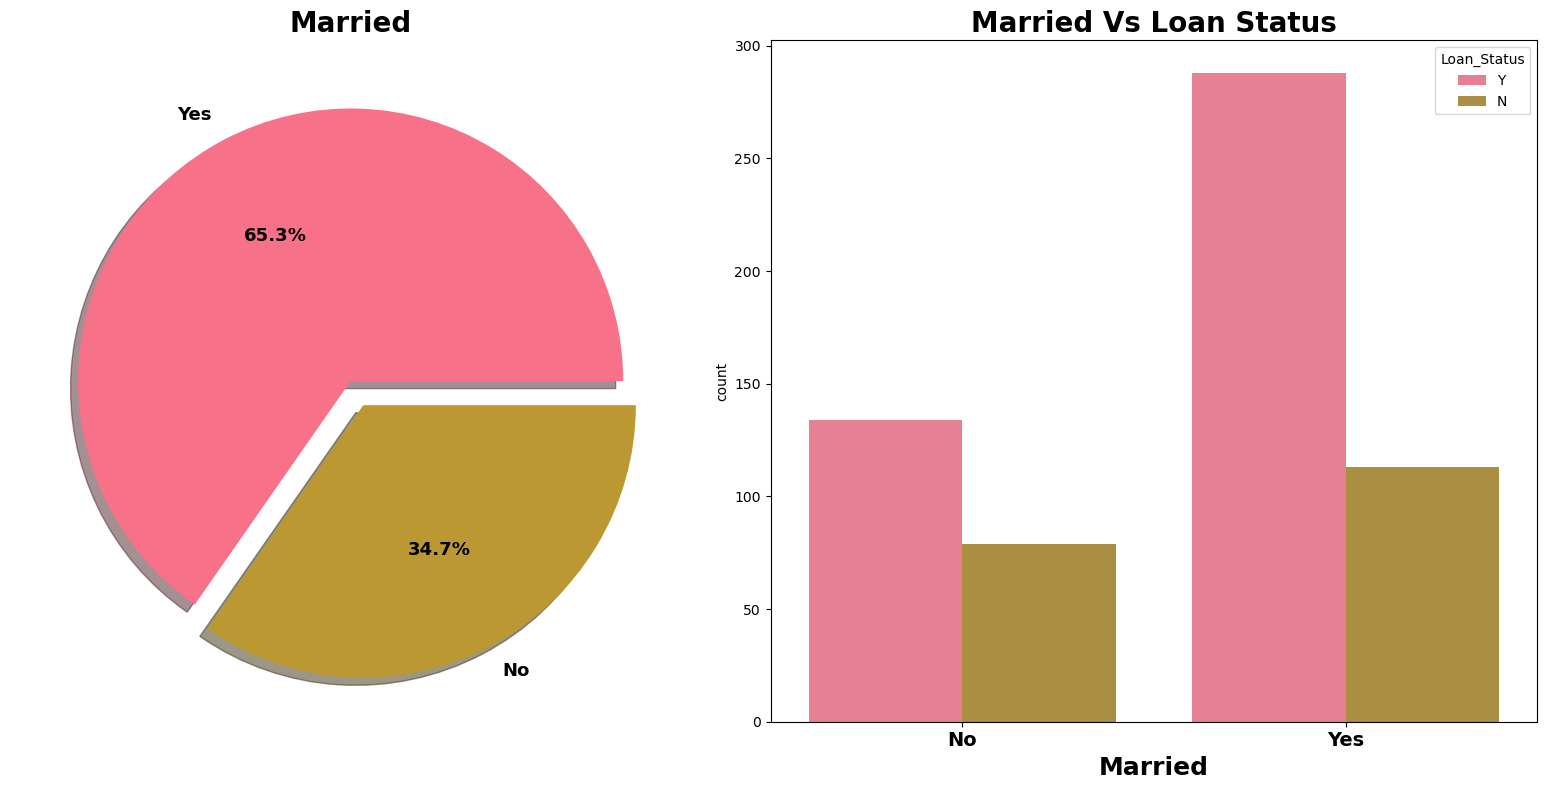

In [20]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Married'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Married', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Married',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('Married Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Married",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [21]:
pd.crosstab([df['Gender'],df['Married']],[df.Loan_Status],margins=True).style.background_gradient(cmap='gist_rainbow_r')


- 65.3 % loan applicants are married. We can see from Count plot that <u> Married people have more possibility of getting loan approval.</u>
- <b> But Here comes Interesting observation from crosstab :</b>
    - Unmarried Women are more chances of getting loan approval compare to married women.<b>We will try to find which factor actually play deciding role here like education, employeement or Income.</b>
    - Married Men are more chances of loan approval.
    
### Let check how number dependents play here. 

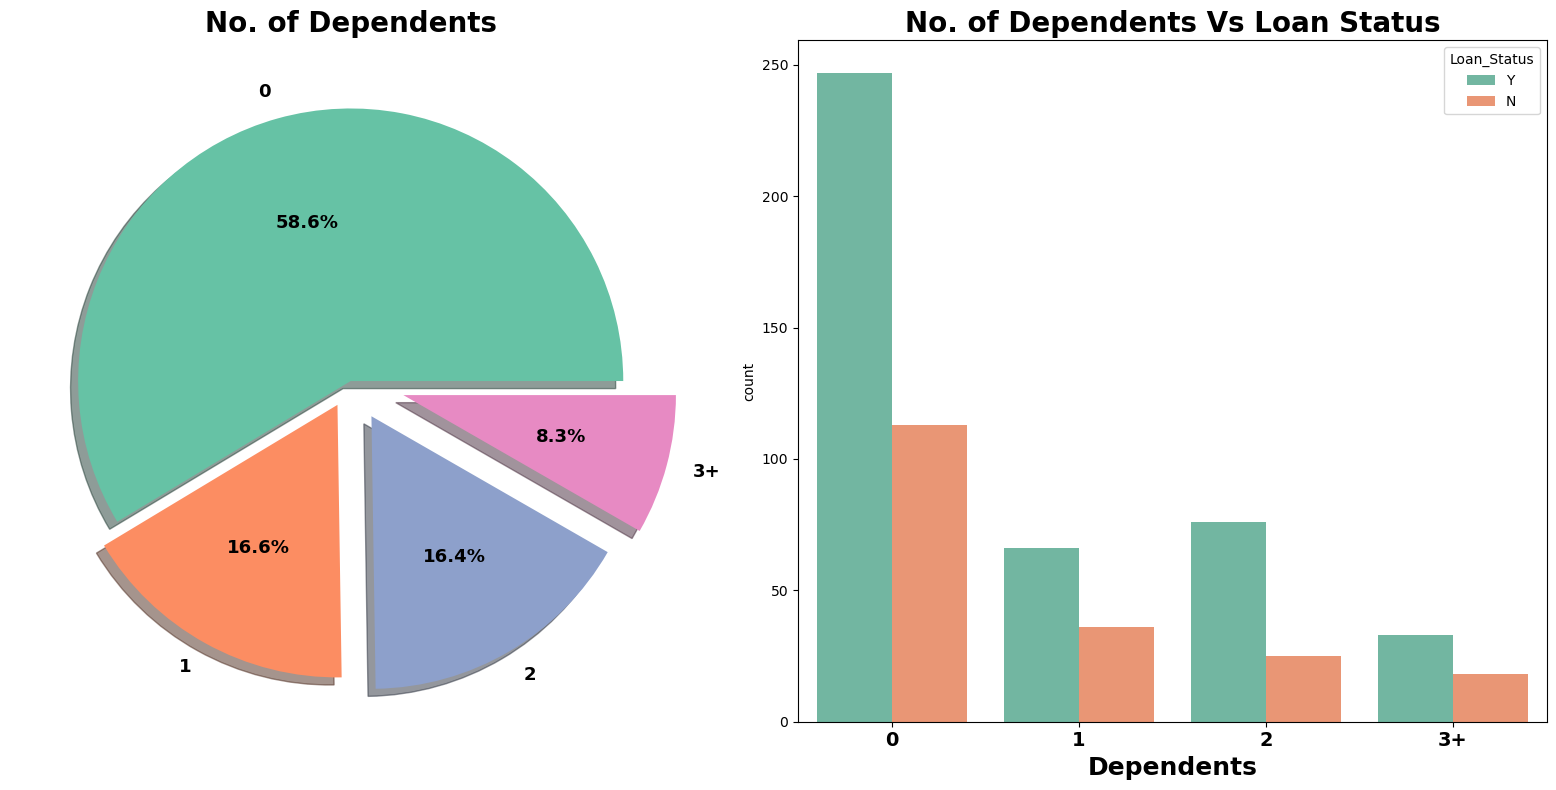

In [22]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Dependents'].value_counts().plot.pie(explode=[0,0.1,0.15,0.2],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('No. of Dependents', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Dependents',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('No. of Dependents Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Dependents",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [23]:
pd.crosstab([df['Dependents']],[df.Loan_Status,df['Gender']],margins=True).style.background_gradient(cmap='summer_r')

In [24]:
pd.crosstab([df['Dependents'],df['Gender']],[df.Loan_Status],margins=True).style.background_gradient(cmap='Blues')

- 58.6% Applicants have no dependents on them.33% Applicants have either 1 or 2 dependents.<b> It will interesting check whether with increase in number dependents their is increase in requirement loan amount.</b>
- Female having zero dependents have more chances to get loan approval compare to Females with dependents.
- For male Maximum loan approval comes with 0 dependents followed by 2 dependents.

In [25]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Education Vs Loan status


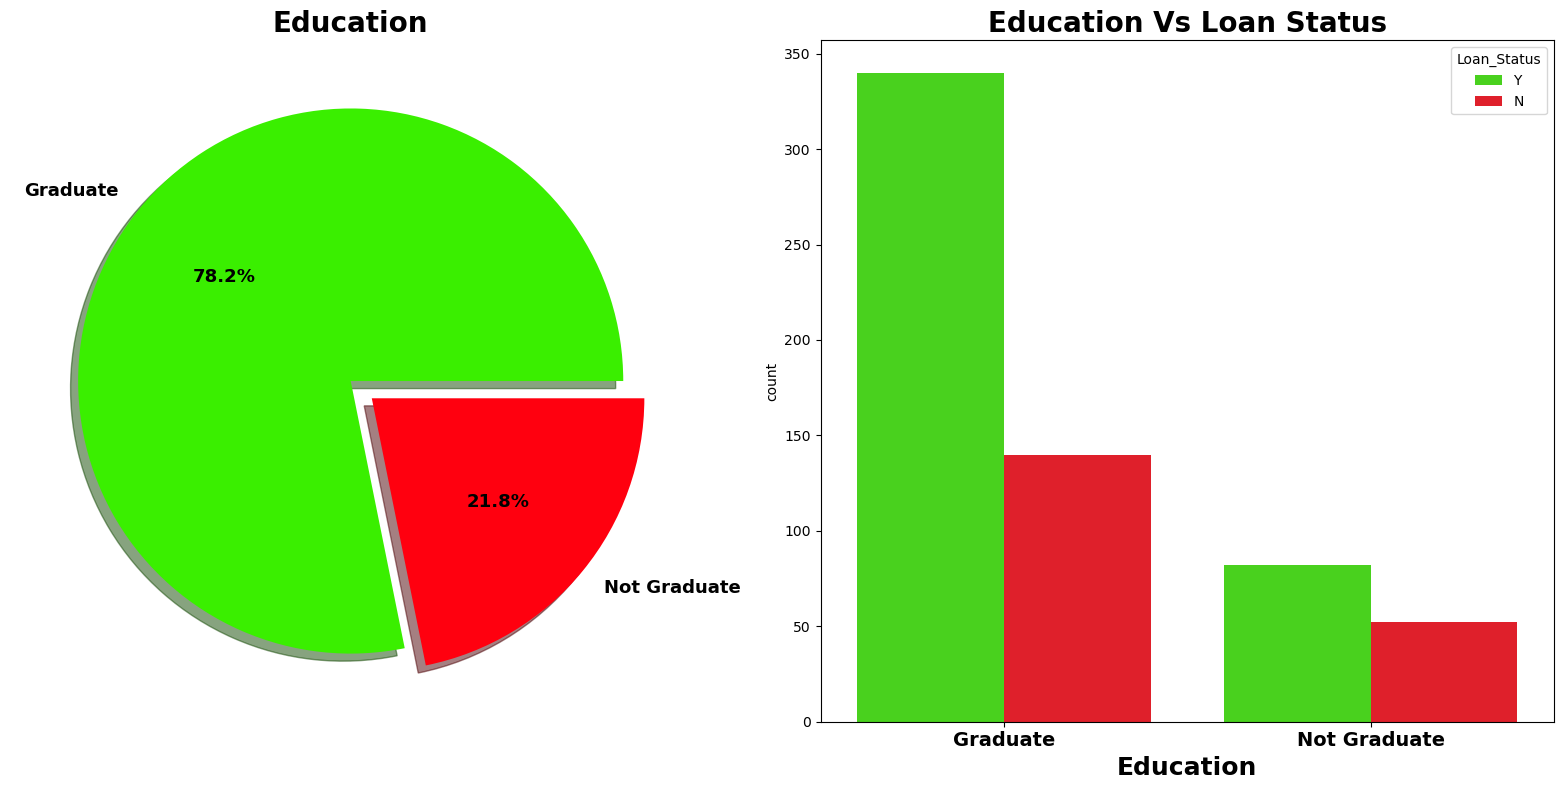

In [26]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('prism')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Education'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Education', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Education',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('Education Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Education",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [27]:
    pd.crosstab([df['Education'],df['Gender']],[df.Loan_Status],margins=True).style.background_gradient(cmap='Blues')


- Graduate applicants are more likely to get loan approval irrespective gender.

## Encoding categorical data


In [28]:
Category=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

In [29]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


#### Outliers Detection and Removal


In [30]:
Numerical =['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

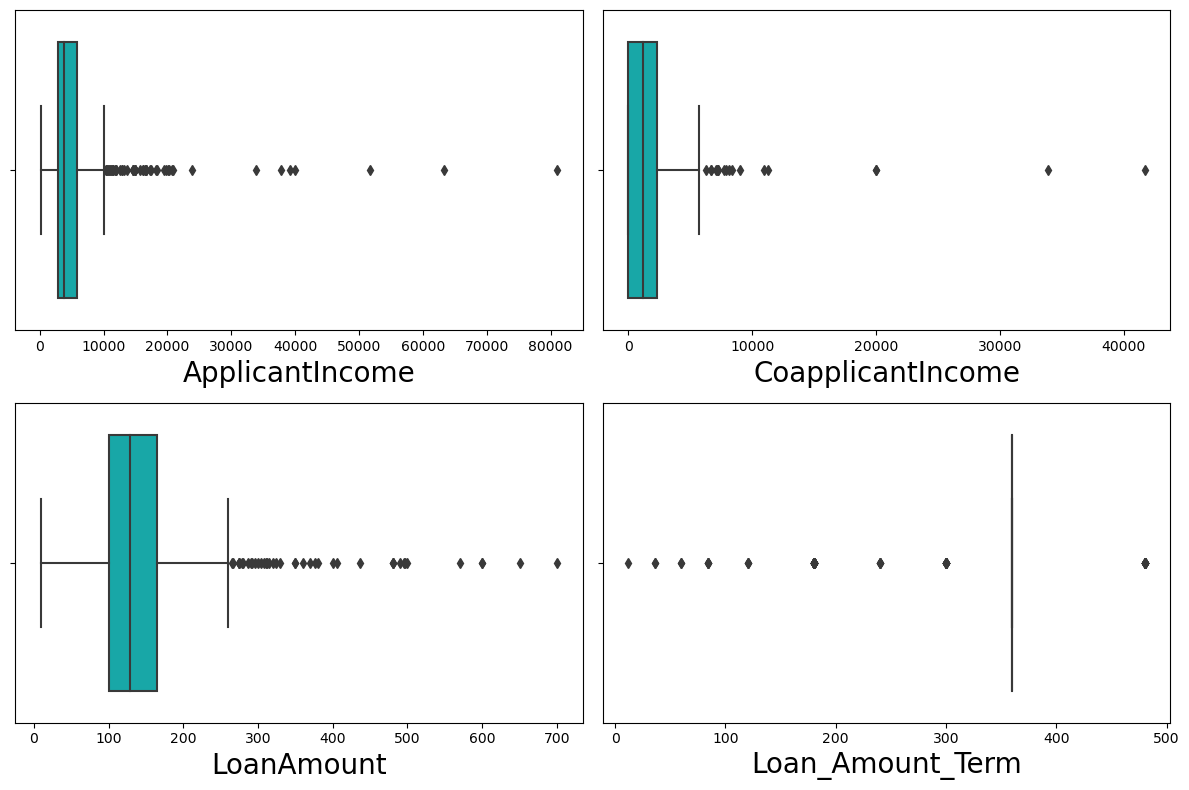

In [31]:
plt.figure(figsize=(12,8),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],color='c')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

<b> Outlier present in dataset</b>

In [32]:
# Droping unnecessary columns
df.drop(["Loan_ID"], axis=1, inplace=True)

In [33]:
df['Dependents'] = df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [34]:
df['Dependents'] =pd.to_numeric(df['Dependents'])

In [35]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (614, 12)
Shape of the dataframe after removing outliers:  (577, 12)
Percentage of data loss post outlier removal:  6.026058631921824


#### Data Loss

In [36]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((614-577)/614)*100,'%')

Percentage Data Loss : 6.026058631921824 %


## Skewness of features

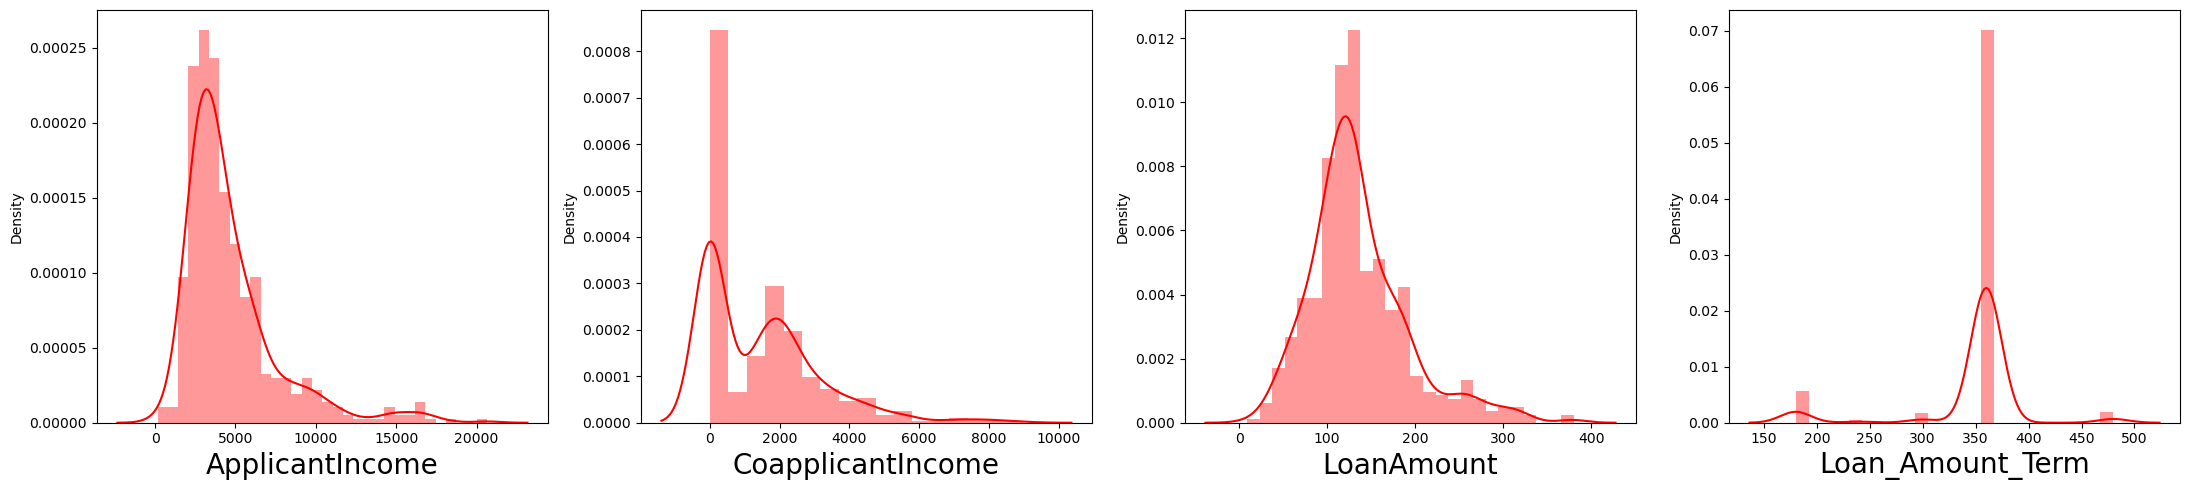

In [37]:
plt.figure(figsize=(22,5),facecolor='white')
plotnum=1
for col in Numerical:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.distplot(df[col],color='r')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [38]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

- <b> Out of all above feature 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount' are skewed which are numerical feature.</b>
- Other features are categorical in nature so skewness is nothing to do with these remaining feature.<u>We will ignore them.</u>
- We will yeo-johnson transformation method.

In [39]:
# Removing skewness using yeo-johnson  method to get better prediction
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [40]:
df[skew] = scaler.fit_transform(df[skew].values)
df[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.681780,-1.122446,0.000771
1,0.234783,0.744117,0.000771
2,-0.527201,-1.122446,-1.437336
3,-0.791972,0.895786,-0.153545
4,0.728848,-1.122446,0.238260


###  Checking skewness after using yeo-johnson ethod


In [41]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [42]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

<b> For Numerical variable skewness is within permissible limit.

So Yes To Go Forward !!!
</b>

## Corrleation 

In [43]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.234551,0.172146,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.335820,0.181878,-0.127348,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,0.004109,0.131772,-0.087389,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,0.049739,-0.128715,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.087338,0.117218,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.360946,0.432154,-0.069429,0.028825,-0.011364,-0.002484
CoapplicantIncome,0.234551,0.335820,0.004109,0.049739,-0.087338,-0.360946,1.000000,0.200081,0.000951,0.006564,-0.074476,0.079344
LoanAmount,0.172146,0.181878,0.131772,-0.128715,0.117218,0.432154,0.200081,1.000000,0.049057,-0.003626,-0.098090,-0.023609
Loan_Amount_Term,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.069429,0.000951,0.049057,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.028825,0.006564,-0.003626,0.027392,1.000000,-0.008121,0.560936


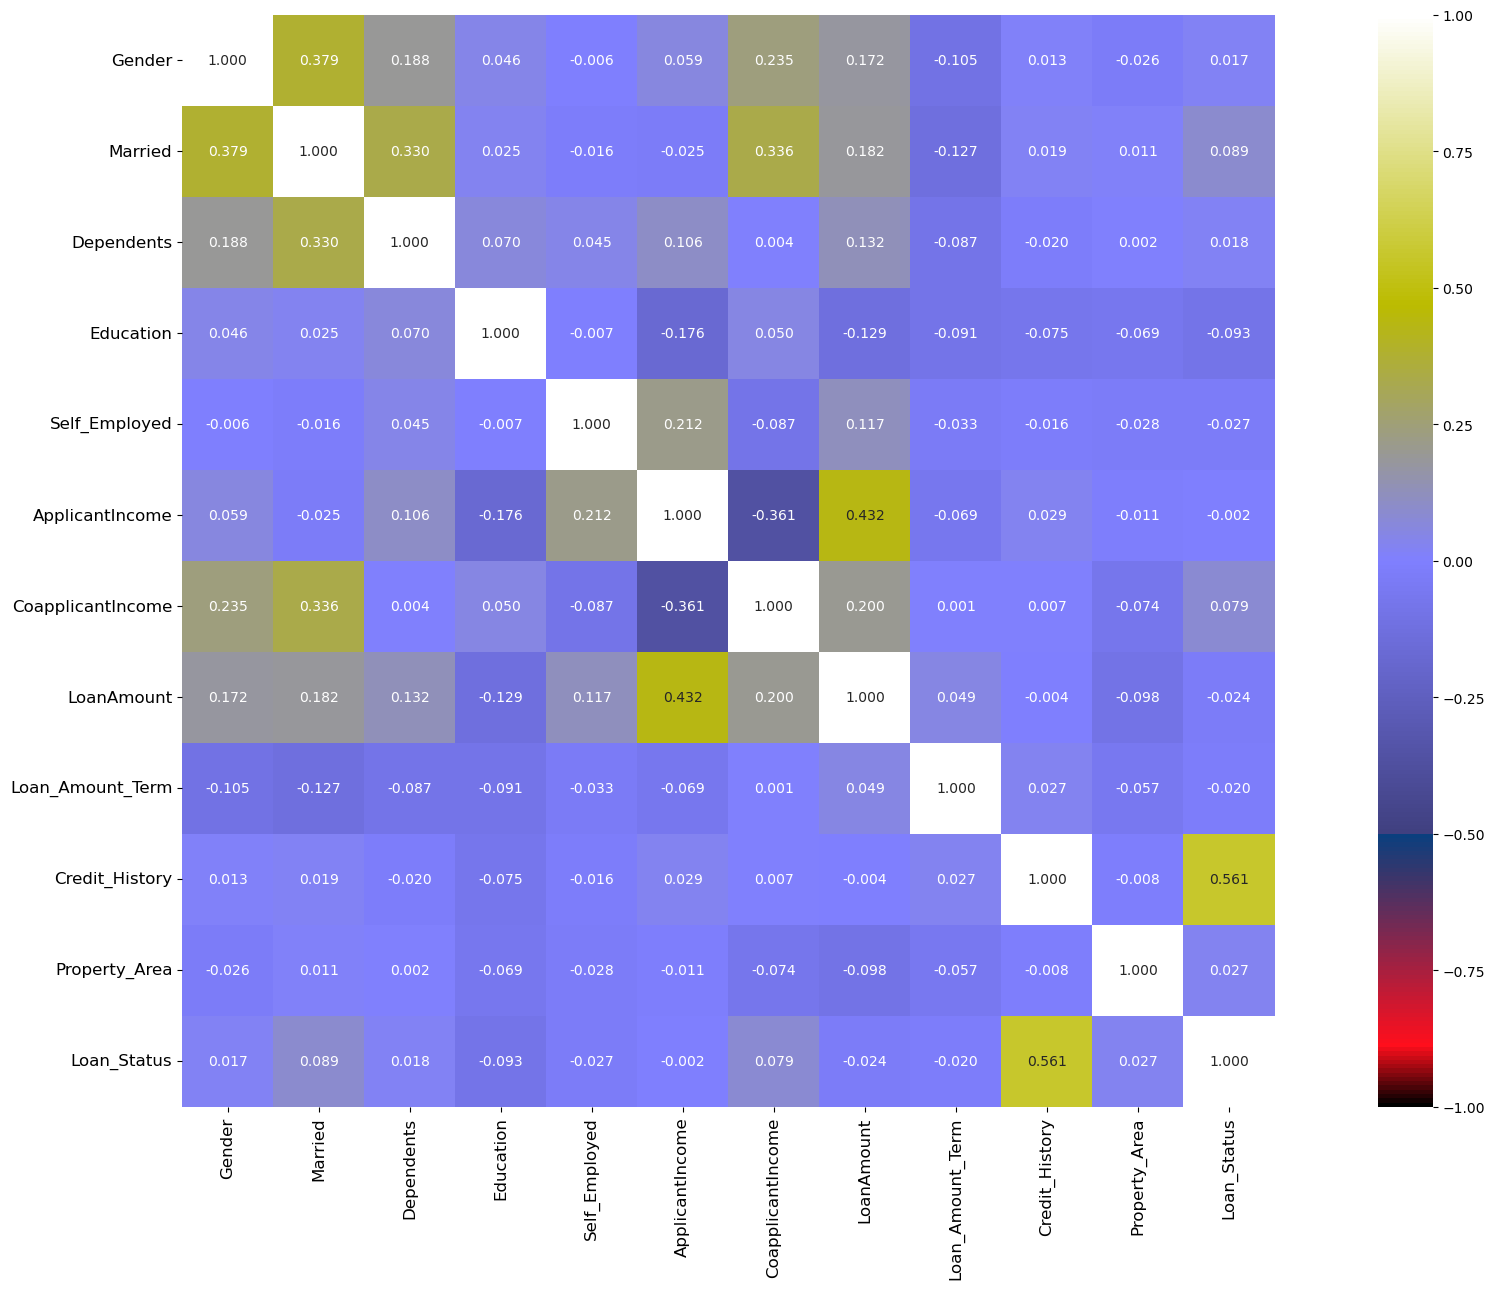

In [44]:
plt.figure(figsize=(21,13))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

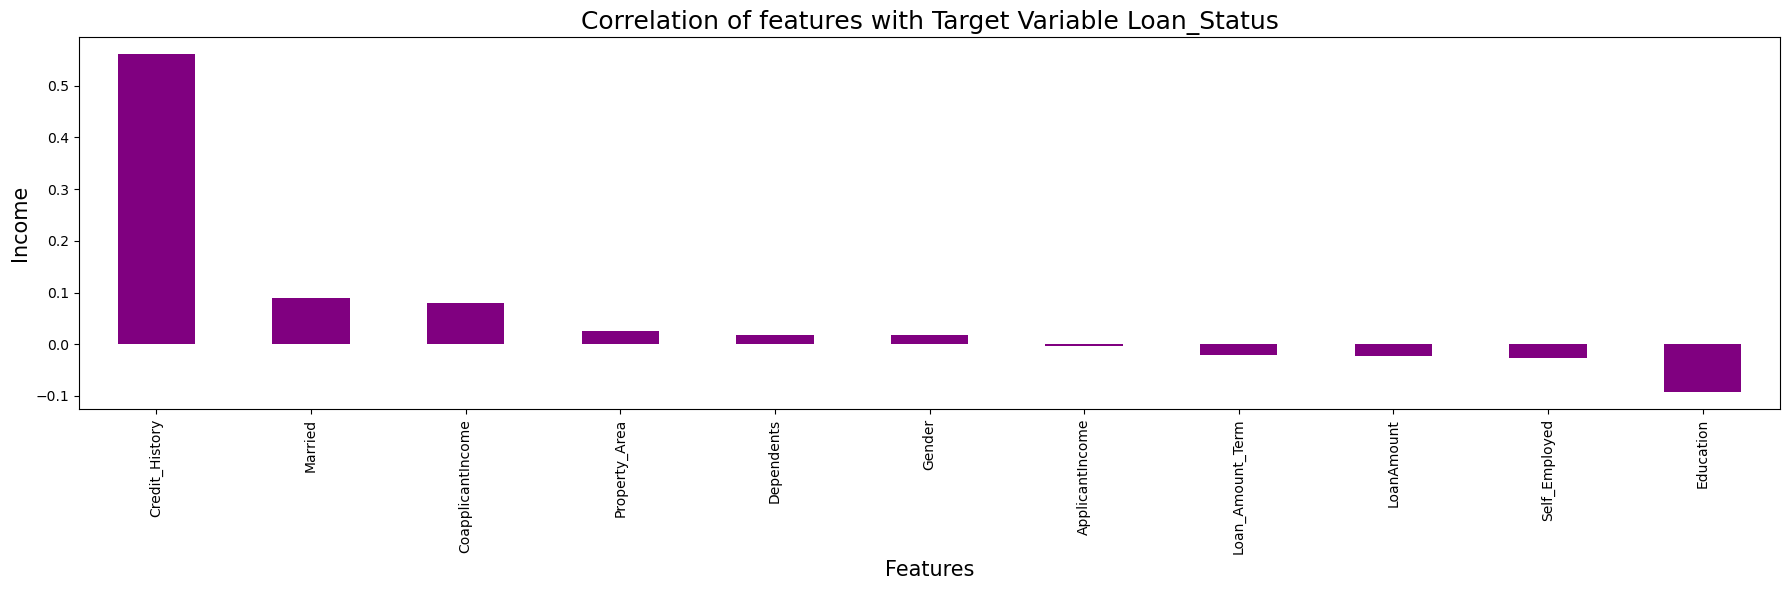

In [45]:
plt.figure(figsize = (18,6))
df.corr()['Loan_Status'].drop(['Loan_Status']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Income',fontsize=15)
plt.title('Correlation of features with Target Variable Loan_Status',fontsize = 18)
plt.show()

<b> Most of feature are poorly or moderately correlated with target variable expect Credit History. </b>
-  Maximum correlation of 0.561 exist between Credit History and Loan status.

## 4. Checking Multicollinearity between features using variance_inflation_factor


In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,6.119789,Gender
1,3.963538,Married
2,1.778377,Dependents
3,1.355469,Education
4,1.197219,Self_Employed
5,1.756726,ApplicantIncome
6,1.596438,CoapplicantIncome
7,1.548450,LoanAmount
8,10.415255,Loan_Amount_Term
9,9.483180,Credit_History


<b> All features VIF is within permissible limit of 10. 

So No Need to Worry About Multicollinearity.</b>


## 5. Balanceing Imbalanced target feature

In [47]:
df.Loan_Status.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

<b> As Target variable data is Imbalanced in nature we will need to balance target variable.</b>

### Balancing using SMOTE

In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
# Splitting data in target and dependent feature
X = df.drop(['Loan_Status'], axis =1)
Y = df['Loan_Status']

In [50]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [51]:
Y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

<b><em> We have successfully resolved the class imbalanced problem and now all the categories have same data ensuring that the ML model does not get biased towards one category.</em></b>

## Standard Scaling

In [52]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

## Machine Learning Model Building

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (557, 11)
Training target vector size: (557,)
Test feature matrix size: (239, 11)
Test target vector size: (239,)


### Finding best Random state

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8158995815899581 on Random_state 78


## Logistics Regression Model

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=78, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8158995815899581


Confusion matrix of Logistics Regression : 
 [[ 74  36]
 [  8 121]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.90      0.67      0.77       110
           1       0.77      0.94      0.85       129

    accuracy                           0.82       239
   macro avg       0.84      0.81      0.81       239
weighted avg       0.83      0.82      0.81       239



### Finding Optimal value of n_neighbors for KNN

In [57]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(25):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.4619406036915484
RMSE value for k=  2 is: 0.5294664560040351
RMSE value for k=  3 is: 0.49262341019056577
RMSE value for k=  4 is: 0.5334030637818674
RMSE value for k=  5 is: 0.50104493321917
RMSE value for k=  6 is: 0.4883581921595791
RMSE value for k=  7 is: 0.4840553929365547
RMSE value for k=  8 is: 0.4664474480124446
RMSE value for k=  9 is: 0.4387124562248739
RMSE value for k=  10 is: 0.45738935374634826
RMSE value for k=  11 is: 0.45738935374634826
RMSE value for k=  12 is: 0.4664474480124446
RMSE value for k=  13 is: 0.4527923591472056
RMSE value for k=  14 is: 0.4664474480124446
RMSE value for k=  15 is: 0.44814821218396267
RMSE value for k=  16 is: 0.47091116165974684
RMSE value for k=  17 is: 0.45738935374634826
RMSE value for k=  18 is: 0.4664474480124446
RMSE value for k=  19 is: 0.44814821218396267
RMSE value for k=  20 is: 0.4527923591472056
RMSE value for k=  21 is: 0.44345543143056887
RMSE value for k=  22 is: 0.4527923591472056
RMSE value fo

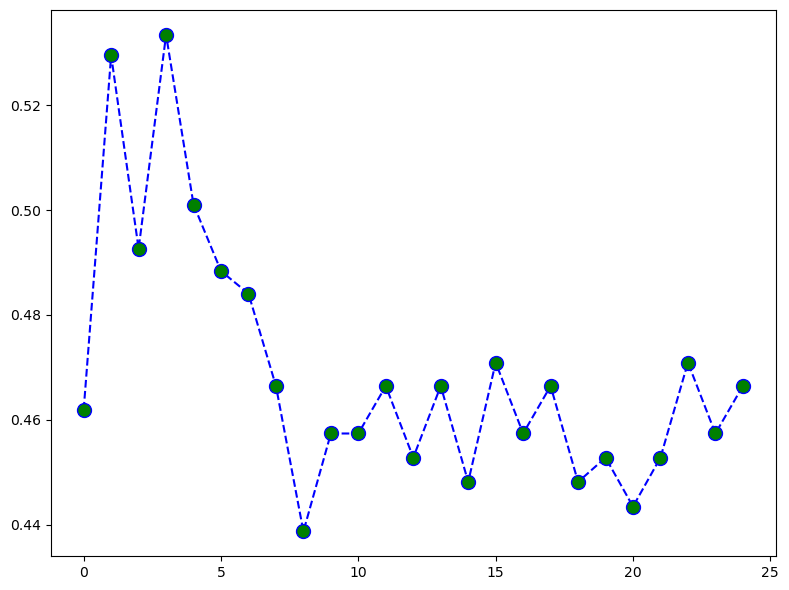

In [58]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(25), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

 
At k=3, we get the minimum RMSE value which approximately 0.44814821218396267, and shoots up on further increasing the k value. We can safely say that k=3 will give us the best result in this case


## Applying other classification algorithm


Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.7949790794979079


Confusion matrix : 
 [[ 76  34]
 [ 15 114]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.69      0.76       110
           1       0.77      0.88      0.82       129

    accuracy                           0.79       239
   macro avg       0.80      0.79      0.79       239
weighted avg       0.80      0.79      0.79       239





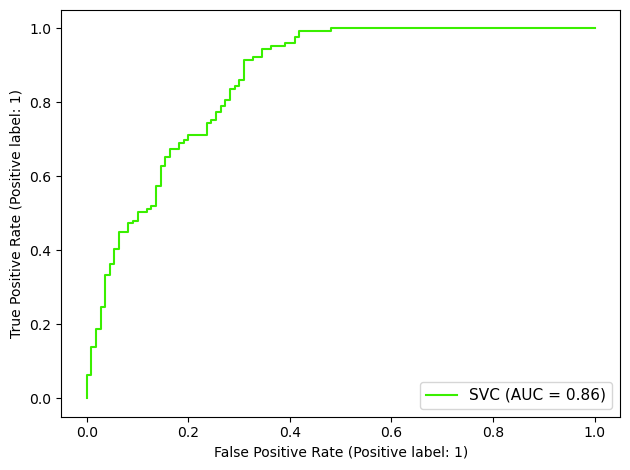

Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score :
 0.7447698744769874


Confusion matrix : 
 [[ 62  48]
 [ 13 116]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.56      0.67       110
           1       0.71      0.90      0.79       129

    accuracy                           0.74       239
   macro avg       0.77      0.73      0.73       239
weighted avg       0.76      0.74      0.74       239





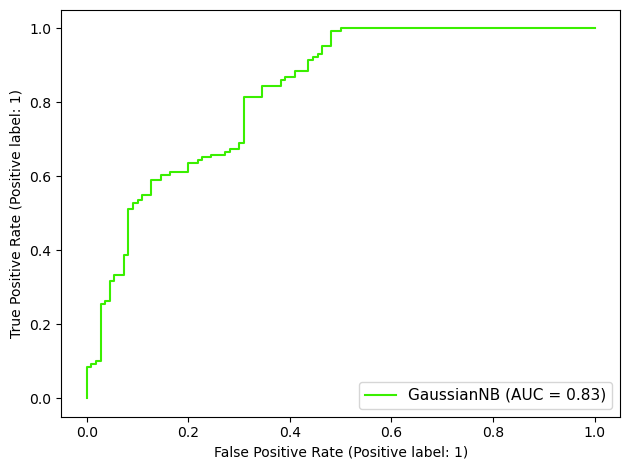

Classification ML Algorithm Evaluation Matrix DecisionTreeClassifier() is


Accuracy Score :
 0.7656903765690377


Confusion matrix : 
 [[91 19]
 [37 92]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.71      0.83      0.76       110
           1       0.83      0.71      0.77       129

    accuracy                           0.77       239
   macro avg       0.77      0.77      0.77       239
weighted avg       0.77      0.77      0.77       239





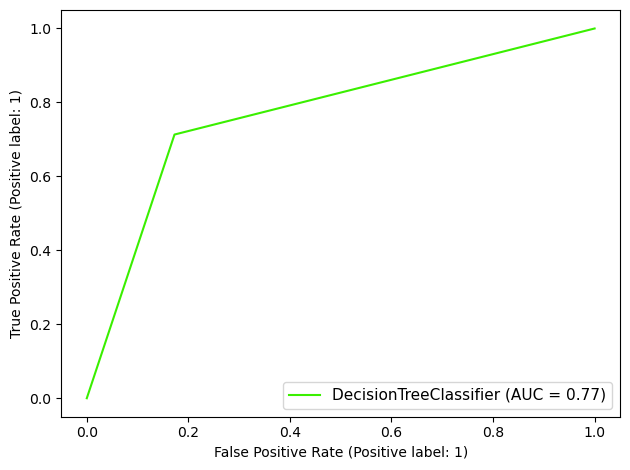

Classification ML Algorithm Evaluation Matrix KNeighborsClassifier(n_neighbors=3) is


Accuracy Score :
 0.7573221757322176


Confusion matrix : 
 [[83 27]
 [31 98]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.73      0.75      0.74       110
           1       0.78      0.76      0.77       129

    accuracy                           0.76       239
   macro avg       0.76      0.76      0.76       239
weighted avg       0.76      0.76      0.76       239





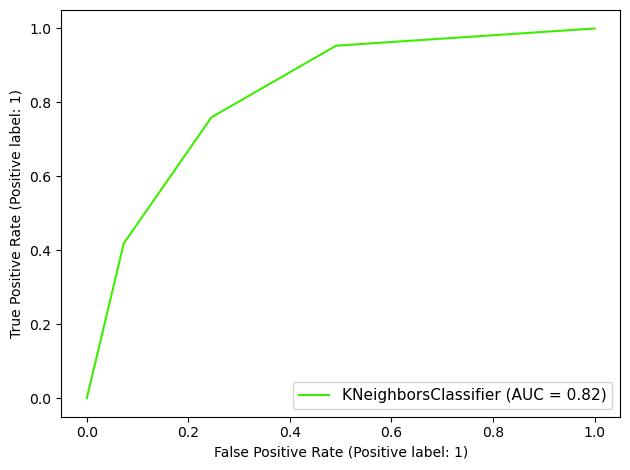

Classification ML Algorithm Evaluation Matrix RandomForestClassifier() is


Accuracy Score :
 0.8368200836820083


Confusion matrix : 
 [[ 90  20]
 [ 19 110]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.82      0.82       110
           1       0.85      0.85      0.85       129

    accuracy                           0.84       239
   macro avg       0.84      0.84      0.84       239
weighted avg       0.84      0.84      0.84       239





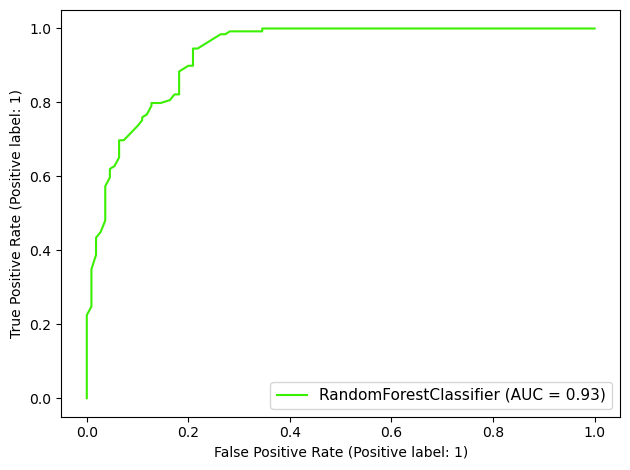

Classification ML Algorithm Evaluation Matrix ExtraTreesClassifier() is


Accuracy Score :
 0.8451882845188284


Confusion matrix : 
 [[ 90  20]
 [ 17 112]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       110
           1       0.85      0.87      0.86       129

    accuracy                           0.85       239
   macro avg       0.84      0.84      0.84       239
weighted avg       0.85      0.85      0.85       239





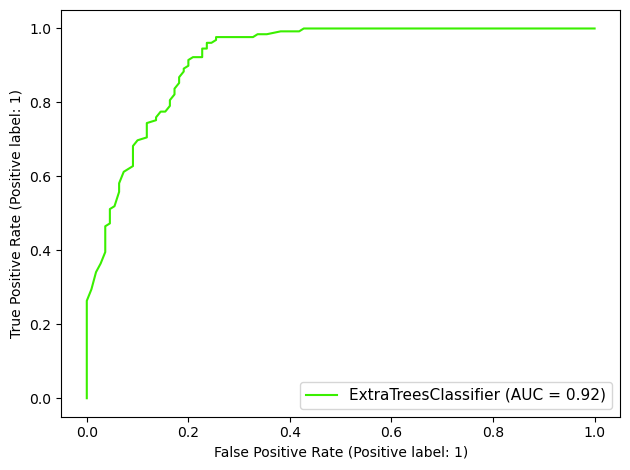

In [59]:
from sklearn.metrics import plot_roc_curve
model=[ 
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    disp = plot_roc_curve(m,X_test,Y_test)   
    plt.legend(prop={'size':11}, loc='lower right')
    plt.show()
    print('============================================================================================================')


## CrossValidation

In [60]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.69375    0.71698113 0.75471698 0.76100629 0.79245283]
Mean Score : 0.7437814465408804
Std deviation : 0.034660026571721736




Cross Validation Score SVC() :

Score : [0.69375    0.72955975 0.78616352 0.74842767 0.78616352]
Mean Score : 0.748812893081761
Std deviation : 0.03519344578527446




Cross Validation Score GaussianNB() :

Score : [0.6875     0.70440252 0.76100629 0.7672956  0.76100629]
Mean Score : 0.7362421383647798
Std deviation : 0.03340778738409943




Cross Validation Score DecisionTreeClassifier() :

Score : [0.71875    0.72955975 0.74213836 0.76100629 0.81761006]
Mean Score : 0.753812893081761
Std deviation : 0.03485897282810091




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.75625    0.73584906 0.73584906 0.73584906 0.79245283]
Mean Score : 0.75125
Std deviation : 0.022064634091860467




Cross Validation Score RandomForestClassifier() :

Score : [0.8125     0.80503145 0.82389937 

#### We can see that  RandomForestClassifier() gives us good Accuracy and maximum f1 score along with best Cross-validation score.  we will apply Hyperparameter tuning on Random Forest model and Used it as final model.

# Hyper Parameter Tuning : GridSearchCV

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [63]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.723 total time=   0.1s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.670 total time=   0.2s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.730 total time=   0.1s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.703 total time=   0.2s
[CV 5

[CV 5/5; 9/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10;, score=0.694 total time=   0.0s
[CV 1/5; 10/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=15
[CV 1/5; 10/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=15;, score=0.786 total time=   0.1s
[CV 2/5; 10/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=15
[CV 2/5; 10/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=15;, score=0.705 total time=   0.1s
[CV 3/5; 10/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=15
[CV 3/5; 10/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=15;, score=0.802 total time=   0.0s
[CV 4/5; 10/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=15
[CV 4/5; 10/168] END bootstrap=True, criterion=gini, 

[CV 1/5; 17/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=15;, score=0.812 total time=   0.2s
[CV 2/5; 17/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=15
[CV 2/5; 17/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=15;, score=0.688 total time=   0.1s
[CV 3/5; 17/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=15
[CV 3/5; 17/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=15;, score=0.775 total time=   0.4s
[CV 4/5; 17/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=15
[CV 4/5; 17/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=15;, score=0.766 total time=   0.1s
[CV 5/5; 17/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=15
[CV 5/5; 17/168] END bootstrap=True, criteri

[CV 5/5; 24/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=15;, score=0.739 total time=   0.0s
[CV 1/5; 25/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=25
[CV 1/5; 25/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=25;, score=0.804 total time=   0.1s
[CV 2/5; 25/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=25
[CV 2/5; 25/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=25;, score=0.714 total time=   0.1s
[CV 3/5; 25/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=25
[CV 3/5; 25/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=25;, score=0.784 total time=   0.1s
[CV 4/5; 25/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=25
[CV 4/5; 25/168] END bootstrap=True, criteri

[CV 1/5; 32/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=25;, score=0.848 total time=   0.1s
[CV 2/5; 32/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=25
[CV 2/5; 32/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=25;, score=0.768 total time=   0.1s
[CV 3/5; 32/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=25
[CV 3/5; 32/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=25;, score=0.811 total time=   0.1s
[CV 4/5; 32/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=25
[CV 4/5; 32/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=25;, score=0.739 total time=   0.1s
[CV 5/5; 32/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=auto, n_estimators=25
[CV 5/5; 32/168] END bootstrap=True, criteri

[CV 1/5; 39/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=25;, score=0.812 total time=   0.1s
[CV 2/5; 39/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=25
[CV 2/5; 39/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=25;, score=0.741 total time=   0.1s
[CV 3/5; 39/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=25
[CV 3/5; 39/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=25;, score=0.820 total time=   0.1s
[CV 4/5; 39/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=25
[CV 4/5; 39/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=25;, score=0.811 total time=   0.1s
[CV 5/5; 39/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=25
[CV 5/5; 39/168] END bootstrap=True, criteri

[CV 1/5; 46/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=25;, score=0.821 total time=   0.1s
[CV 2/5; 46/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=25
[CV 2/5; 46/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=25;, score=0.786 total time=   0.1s
[CV 3/5; 46/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=25
[CV 3/5; 46/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=25;, score=0.811 total time=   0.1s
[CV 4/5; 46/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=25
[CV 4/5; 46/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=25;, score=0.766 total time=   0.1s
[CV 5/5; 46/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=25
[CV 5/5; 46/168] END bootstrap=True, criteri

[CV 1/5; 53/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=25;, score=0.768 total time=   0.1s
[CV 2/5; 53/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=25
[CV 2/5; 53/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=25;, score=0.705 total time=   0.1s
[CV 3/5; 53/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=25
[CV 3/5; 53/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=25;, score=0.775 total time=   0.1s
[CV 4/5; 53/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=25
[CV 4/5; 53/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=25;, score=0.748 total time=   0.1s
[CV 5/5; 53/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=25
[CV 5/5; 53/168] END bootstrap=True, criteri

[CV 1/5; 60/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=25;, score=0.821 total time=   0.1s
[CV 2/5; 60/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=25
[CV 2/5; 60/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=25;, score=0.741 total time=   0.1s
[CV 3/5; 60/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=25
[CV 3/5; 60/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=25;, score=0.811 total time=   0.1s
[CV 4/5; 60/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=25
[CV 4/5; 60/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=25;, score=0.793 total time=   0.1s
[CV 5/5; 60/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=25
[CV 5/5; 60/168] END bootstrap=True, criteri

[CV 3/5; 67/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25;, score=0.829 total time=   0.3s
[CV 4/5; 67/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25
[CV 4/5; 67/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25;, score=0.721 total time=   0.3s
[CV 5/5; 67/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25
[CV 5/5; 67/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25;, score=0.712 total time=   0.4s
[CV 1/5; 68/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=50
[CV 1/5; 68/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=50;, score=0.839 total time=   0.2s
[CV 2/5; 68/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=50
[CV 2/5; 68/168] END bootstrap=True, criteri

[CV 3/5; 74/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=25;, score=0.829 total time=   0.1s
[CV 4/5; 74/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=25
[CV 4/5; 74/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=25;, score=0.748 total time=   0.1s
[CV 5/5; 74/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=25
[CV 5/5; 74/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=25;, score=0.775 total time=   0.1s
[CV 1/5; 75/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=50
[CV 1/5; 75/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=50;, score=0.839 total time=   0.1s
[CV 2/5; 75/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=50
[CV 2/5; 75/168] END bootstrap=True, criteri

[CV 3/5; 81/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=25;, score=0.838 total time=   0.7s
[CV 4/5; 81/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=25
[CV 4/5; 81/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=25;, score=0.784 total time=   0.4s
[CV 5/5; 81/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=25
[CV 5/5; 81/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=25;, score=0.712 total time=   0.3s
[CV 1/5; 82/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=50
[CV 1/5; 82/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=50;, score=0.821 total time=   0.7s
[CV 2/5; 82/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=50
[CV 2/5; 82/168] END bootstrap=True, criteri

[CV 1/5; 89/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=50;, score=0.786 total time=   0.1s
[CV 2/5; 89/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=50
[CV 2/5; 89/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=50;, score=0.723 total time=   0.1s
[CV 3/5; 89/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=50
[CV 3/5; 89/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=50;, score=0.811 total time=   0.1s
[CV 4/5; 89/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=50
[CV 4/5; 89/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=50;, score=0.739 total time=   0.1s
[CV 5/5; 89/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=auto, n_estimators=50
[CV 5/5; 89/168] END bootstr

[CV 5/5; 95/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=25;, score=0.730 total time=   0.1s
[CV 1/5; 96/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=50
[CV 1/5; 96/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=50;, score=0.750 total time=   0.1s
[CV 2/5; 96/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=50
[CV 2/5; 96/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=50;, score=0.714 total time=   0.1s
[CV 3/5; 96/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=50
[CV 3/5; 96/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=50;, score=0.802 total time=   0.1s
[CV 4/5; 96/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=50
[CV 4/5; 96/168] END bootstr

[CV 1/5; 103/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50;, score=0.777 total time=   0.1s
[CV 2/5; 103/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50
[CV 2/5; 103/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50;, score=0.705 total time=   0.2s
[CV 3/5; 103/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50
[CV 3/5; 103/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50;, score=0.811 total time=   0.1s
[CV 4/5; 103/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50
[CV 4/5; 103/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50;, score=0.793 total time=   0.2s
[CV 5/5; 103/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50
[CV 5/5; 103

[CV 2/5; 110/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=50;, score=0.741 total time=   0.1s
[CV 3/5; 110/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=50
[CV 3/5; 110/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=50;, score=0.793 total time=   0.1s
[CV 4/5; 110/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=50
[CV 4/5; 110/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=50;, score=0.775 total time=   0.1s
[CV 5/5; 110/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=50
[CV 5/5; 110/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=50;, score=0.730 total time=   0.1s
[CV 1/5; 111/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=60
[CV 1/5; 111

[CV 1/5; 117/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=50;, score=0.848 total time=   0.1s
[CV 2/5; 117/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=50
[CV 2/5; 117/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=50;, score=0.750 total time=   0.1s
[CV 3/5; 117/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=50
[CV 3/5; 117/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=50;, score=0.820 total time=   0.2s
[CV 4/5; 117/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=50
[CV 4/5; 117/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=50;, score=0.820 total time=   0.3s
[CV 5/5; 117/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=auto, n_estimators=50
[CV 5/5; 117

[CV 1/5; 124/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=50;, score=0.857 total time=   0.2s
[CV 2/5; 124/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=50
[CV 2/5; 124/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=50;, score=0.723 total time=   0.1s
[CV 3/5; 124/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=50
[CV 3/5; 124/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=50;, score=0.793 total time=   0.1s
[CV 4/5; 124/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=50
[CV 4/5; 124/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=50;, score=0.793 total time=   0.1s
[CV 5/5; 124/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=50
[CV 5/5; 124

[CV 5/5; 130/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=25;, score=0.766 total time=   0.1s
[CV 1/5; 131/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50
[CV 1/5; 131/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50;, score=0.812 total time=   0.2s
[CV 2/5; 131/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50
[CV 2/5; 131/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50;, score=0.714 total time=   0.2s
[CV 3/5; 131/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50
[CV 3/5; 131/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50;, score=0.847 total time=   0.2s
[CV 4/5; 131/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, n_estimators=50
[CV 4/5; 131

[CV 1/5; 138/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=50;, score=0.839 total time=   0.1s
[CV 2/5; 138/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=50
[CV 2/5; 138/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=50;, score=0.688 total time=   0.1s
[CV 3/5; 138/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=50
[CV 3/5; 138/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=50;, score=0.829 total time=   0.1s
[CV 4/5; 138/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=50
[CV 4/5; 138/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=50;, score=0.811 total time=   0.1s
[CV 5/5; 138/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=50
[CV 5/5; 138

[CV 5/5; 144/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=25;, score=0.748 total time=   0.4s
[CV 1/5; 145/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=50
[CV 1/5; 145/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=50;, score=0.777 total time=   0.4s
[CV 2/5; 145/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=50
[CV 2/5; 145/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=50;, score=0.750 total time=   0.4s
[CV 3/5; 145/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=50
[CV 3/5; 145/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=50;, score=0.838 total time=   0.4s
[CV 4/5; 145/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, n_estimators=50
[CV 4/5; 145

[CV 4/5; 151/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=25;, score=0.802 total time=   0.1s
[CV 5/5; 151/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=25
[CV 5/5; 151/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=25;, score=0.730 total time=   0.1s
[CV 1/5; 152/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=50
[CV 1/5; 152/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=50;, score=0.839 total time=   0.1s
[CV 2/5; 152/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=50
[CV 2/5; 152/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=50;, score=0.741 total time=   0.1s
[CV 3/5; 152/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=50
[CV 3/5; 152

[CV 4/5; 158/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=25;, score=0.766 total time=   0.3s
[CV 5/5; 158/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=25
[CV 5/5; 158/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=25;, score=0.757 total time=   0.2s
[CV 1/5; 159/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=50
[CV 1/5; 159/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=50;, score=0.812 total time=   0.3s
[CV 2/5; 159/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=50
[CV 2/5; 159/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=50;, score=0.741 total time=   0.3s
[CV 3/5; 159/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, n_estimators=50
[CV 3/5; 159

[CV 3/5; 165/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=25;, score=0.802 total time=   0.1s
[CV 4/5; 165/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=25
[CV 4/5; 165/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=25;, score=0.775 total time=   0.1s
[CV 5/5; 165/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=25
[CV 5/5; 165/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=25;, score=0.757 total time=   0.1s
[CV 1/5; 166/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=50
[CV 1/5; 166/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=50;, score=0.830 total time=   0.1s
[CV 2/5; 166/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=50
[CV 2/5; 166

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [64]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 50}

# Final Model

In [65]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 50, max_depth=20 ,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8577405857740585


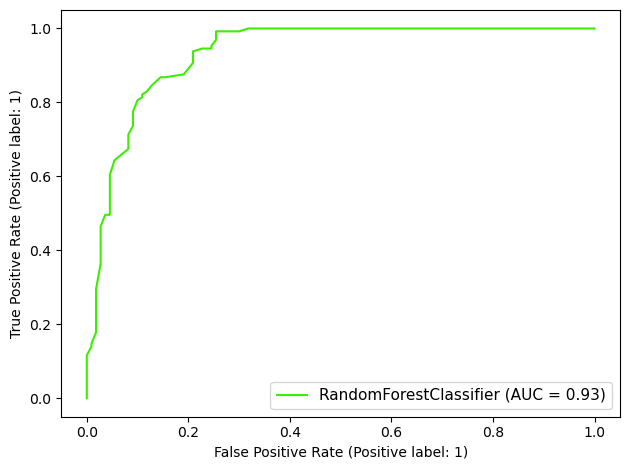

<Figure size 1000x1000 with 0 Axes>

Auc Score :
 0.8568357998590557


In [66]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.figure(figsize=(10,10))
plt.show()
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

## Saving model

In [67]:
import joblib
joblib.dump(Final_mod,'Loan_Status_Final.pkl')

['Loan_Status_Final.pkl']